https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset
● Description of your dataset: resource, dimension, variable description, etc.
● Statement of the research questions, and a summary of methods being used in the analysis
● The explanatory data analysis may include but not limited to graphs, demographic summaries, crosstables, individual tests, etc.. And some initial findings at this point.
● Regression analysis that may include but not limited to multiple linear regression model and logistic regression model.

"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"windspeed" - wind speed in km/h
"weathercode" - category of the weather
"isholiday" - boolean field - 1 holiday / 0 non holiday   ##bealoon variable
"isweekend" - boolean field - 1 if the day is weekend     ##categorical variable
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.  ##categorical variable

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [41]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
from statsmodels.stats.diagnostic import het_breuschpagan


data = pd.read_csv("london_merged.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
data.shape
data.isnull().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

In [8]:
data.sample(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
10999,2016-04-09 04:00:00,96,8.5,5.5,84.5,17.0,7.0,0.0,1.0,0.0
10550,2016-03-20 19:00:00,632,9.5,7.5,71.5,14.0,2.0,0.0,1.0,0.0
12966,2016-06-30 18:00:00,3738,19.5,19.5,62.0,27.0,2.0,0.0,0.0,1.0
13354,2016-07-16 22:00:00,1110,21.5,21.5,71.0,19.5,1.0,0.0,1.0,1.0
3179,2015-05-16 19:00:00,2197,16.5,16.5,43.5,21.0,1.0,0.0,1.0,0.0


In [9]:
data["timestamp"] = pd.to_datetime(data["timestamp"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [10]:
sorted(data['season'].unique()),sorted(data['weather_code'].unique())

([0.0, 1.0, 2.0, 3.0], [1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 26.0])

<AxesSubplot:>

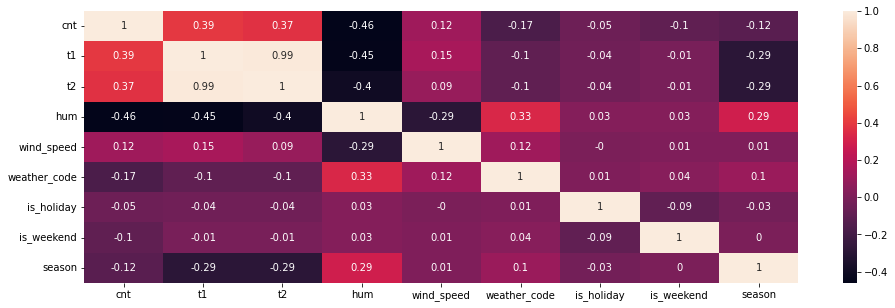

In [11]:
import seaborn as sns
correlation_matrix = data.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('cnt~t1+hum+wind_speed+C(weather_code)+C(is_holiday)+C(is_weekend)+C(season)', data=data, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor                 features
0    79.139555                Intercept
1     1.338807   C(weather_code)[T.2.0]
2     1.447794   C(weather_code)[T.3.0]
3     1.231866   C(weather_code)[T.4.0]
4     1.470471   C(weather_code)[T.7.0]
5     1.003010  C(weather_code)[T.10.0]
6     1.023318  C(weather_code)[T.26.0]
7     1.027471     C(is_holiday)[T.1.0]
8     1.017796     C(is_weekend)[T.1.0]
9     2.439167         C(season)[T.1.0]
10    1.764904         C(season)[T.2.0]
11    1.670345         C(season)[T.3.0]
12    2.611878                       t1
13    1.869471                      hum
14    1.291169               wind_speed


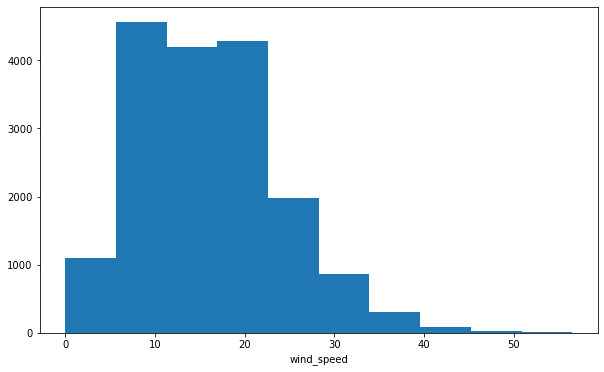

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(data['wind_speed'])
ax.set_xlabel("wind_speed")
plt.show()

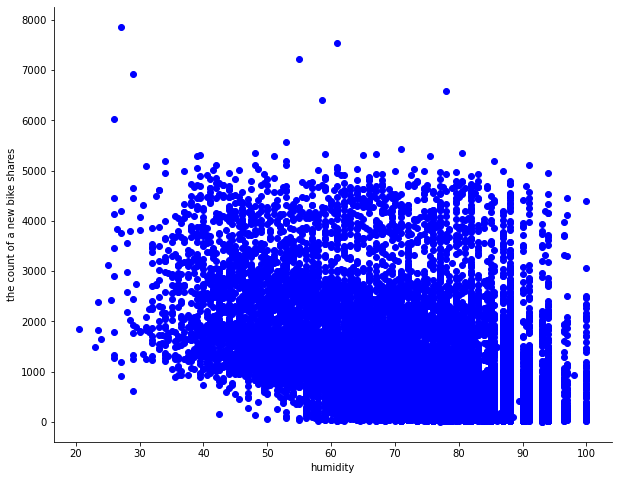

In [23]:
fig, ax = plt.subplots(figsize=(10,8))


ax.set_xlabel('humidity')
ax.set_ylabel('the count of a new bike shares')
ax.scatter(data.hum,data.cnt,color='blue')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

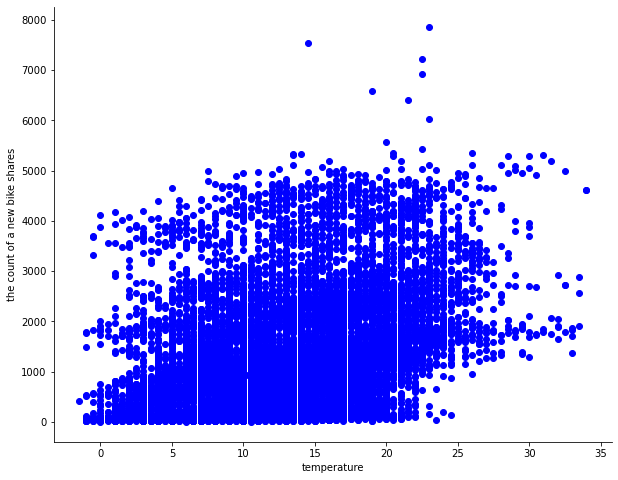

In [25]:
fig, ax = plt.subplots(figsize=(10,8))


ax.set_xlabel('temperature')
ax.set_ylabel('the count of a new bike shares')
ax.scatter(data.t1,data.cnt,color='blue')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



In [16]:
# delete the variable t2
# fit the model
model =smf.ols('cnt~t1+hum+wind_speed+C(weather_code)+C(is_holiday)+C(is_weekend)+C(season)',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     506.6
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:01:37   Log-Likelihood:            -1.4345e+05
No. Observations:               17414   AIC:                         2.869e+05
Df Residuals:                   17399   BIC:                         2.870e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2561.0622     61.680     41.522      0.000    2440.163    2681.962
C(weather_code)[T.2.0]    280.1987     19.016     14.735      0.000     242.926     317.471
C(weather_code)[T.3.0]    278.8253     20.706     13.466      0.000     238.239     319.411
C(weather_code)[T.4.0]    -97.0909     27.732     -3.501      0.000    -151.448     -42.734
C(weather_code)[T.7.0]      5.0129     25.604      0.196      0.845     -45.173      55.199
C(weather_code)[T.10.0]  -389.2944    244.998     -1.589      0.112    -869.515      90.926
C(weather_code)[T.26.0]    27.2601    119.696      0.228      0.820    -207.355     261.875
C(is_holiday)[T.1.0]     -259.2138     47.859     -5.416      0.000    -353.021    -165.406
C(is_weekend)[T.1.0]     -198.7065     15.489    -12.829      0.000    -229.066    -168.347
C(season)[T.1.0]         -123.8729     24.944     -4.966      0.000    -172.765     -74.980
C(season)[T.2.0]          113.7921     21.355      5.329      0.000      71.934     155.651
C(season)[T.3.0]          135.4103     20.732      6.532      0.000      94.774     176.047
t1                         52.8609      2.011     26.284      0.000      48.919      56.803
hum                       -28.1949      0.662    -42.568      0.000     -29.493     -26.897
wind_speed                 -7.5405      0.998     -7.556      0.000      -9.497      -5.584
==============================================================================
Omnibus:                     4812.852   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12224.414
Skew:                           1.515   Prob(JB):                         0.00
Kurtosis:                       5.768   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(weather_code),6.0,1.340602e+09,2.234336e+08,266.901330,0.000000e+00
C(is_holiday),1.0,4.670732e+07,4.670732e+07,55.793956,8.428578e-14
C(is_weekend),1.0,1.440971e+08,1.440971e+08,172.130387,3.887741e-39
C(season),3.0,6.951784e+08,2.317261e+08,276.807075,1.582626e-175
t1,1.0,2.168369e+09,2.168369e+09,2590.212815,0.000000e+00
hum,1.0,1.494968e+09,1.494968e+09,1785.805003,0.000000e+00
wind_speed,1.0,4.779105e+07,4.779105e+07,57.088521,4.372701e-14
Residual,17399.0,1.456539e+10,8.371395e+05,NaN,NaN


In [18]:
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,1.443262e+09,1.0,1724.040153,0.000000e+00
C(weather_code),3.656272e+08,6.0,72.792963,4.898383e-90
C(is_holiday),2.455807e+07,1.0,29.335699,6.167170e-08
C(is_weekend),1.377785e+08,1.0,164.582447,1.669304e-37
C(season),1.209438e+08,3.0,48.157573,5.504405e-31
t1,5.783403e+08,1.0,690.852925,2.371478e-149
hum,1.516944e+09,1.0,1812.056539,0.000000e+00
wind_speed,4.779105e+07,1.0,57.088521,4.372701e-14
Residual,1.456539e+10,17399.0,NaN,NaN


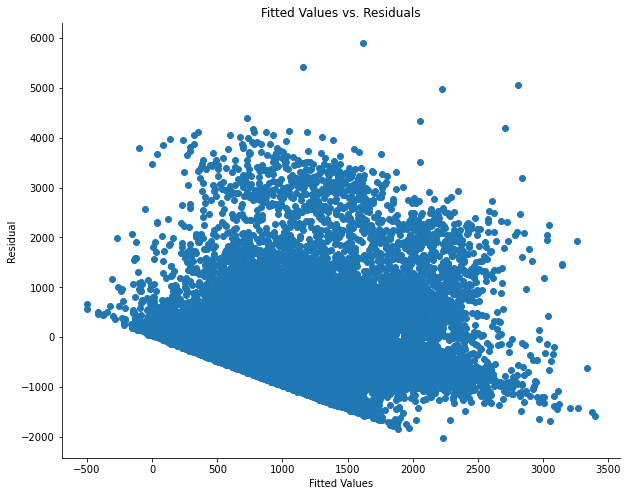

In [26]:
#Fitted Values vs. Residuals

fig, ax = plt.subplots(figsize=(10,8))

p = model.fittedvalues
res = model.resid
ax.scatter(p,res)
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residual")
ax.set_title("Fitted Values vs. Residuals")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)




### Fitted Values vs. Residuals

- error term has mean 0? No. Might suggest need to transform data for a better fit.
- constant variance? No, the variance doesn't seem to be normally distributed
- indepedence? Maybe

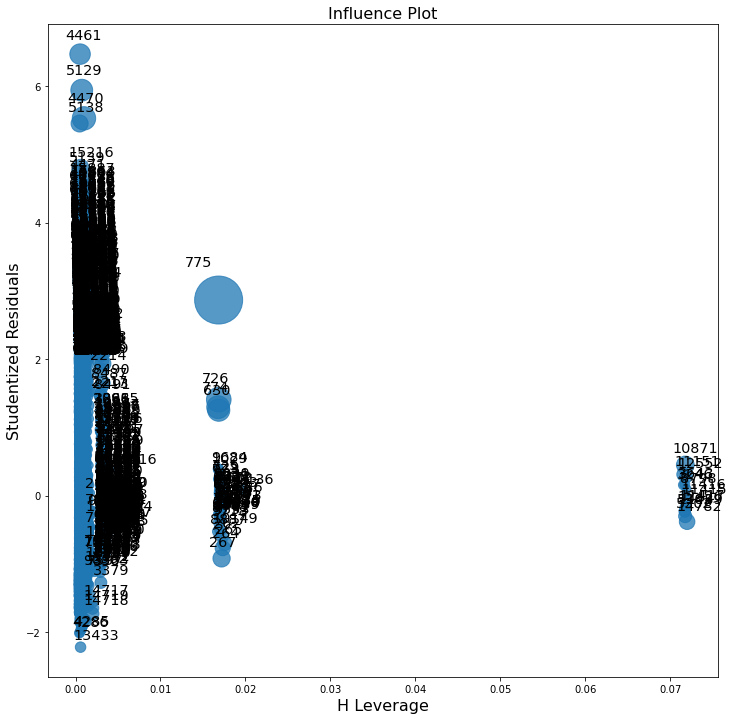

In [30]:
# Influential Points
infl = model.get_influence()

# fig, ax = plt.subplots(figsize=(12,12))
# fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 

In [32]:
### externally studentized residuals

n=len(data)
p=15
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
#detection - absolute value > threshold
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
#which ones?
print(data.index[atyp_stud],reg_studs[atyp_stud])

Int64Index([   32,    56,    80,   127,   199,   223,   247,   271,   295,
              367,
            ...
            17086, 17110, 17185, 17186, 17187, 17188, 17189, 17190, 17191,
            17398],
           dtype='int64', length=972) [ 2.21744542  3.01754027  2.94647433  2.54125065  2.50477528  2.87581132
  3.15559923  2.75535629  2.22378871  3.16923721  2.09637749  4.16049038
  1.98070058  2.25745526  2.10043644  3.40088426  2.42669994  2.50323399
  3.3560484   3.33655418  2.8620244   3.47106571  2.98995483  3.4039448
  2.93725964  3.07590711  2.92971686  3.24188519  2.86701022  2.48510699
  3.67456674  3.73558487  2.08077026  2.9291503   2.08542365  2.87804678
  2.58343621  3.10229886  3.34991565  3.00933701  2.72763311  2.46205176
  3.07110527  3.41289198  2.34359723  3.17423624  3.08497774  2.9713295
  3.26685481  3.33485606  3.25646619  2.55159501  3.29491986  2.30523307
  2.01248151  3.51222769  3.89685902  3.24125657  2.71813692  2.25276859
  3.5303497   3.7534282   3.6

In [33]:
### Cook's Distance

inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(data.index[atyp_cook],reg_cook[atyp_cook])

Int64Index([   32,    56,    80,   127,   136,   199,   223,   247,   262,
              264,
            ...
            17062, 17110, 17185, 17186, 17187, 17188, 17189, 17190, 17191,
            17398],
           dtype='int64', length=744) 32       0.000231
56       0.000452
80       0.000284
127      0.000279
136      0.000230
           ...   
17188    0.001023
17189    0.000885
17190    0.000420
17191    0.000452
17398    0.000329
Name: cooks_d, Length: 744, dtype: float64


- Result: There are around 744 Influential Points in our data. However, since we do not access to additional information regarding those dataset, let's proceed for now.

### Heteroskedasticity

In [35]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 786.0547224922176, 'LM-Test p-value': 1.0623161944441747e-158}


- Result: P-value is <<< 0.05. Therefore, serious heteroskedasticity exists in our model
- Let's try transforming our response ( ln(y) )

### Model 2:  Ln Transformation  - ln(y)

In [46]:
data['cnt_log'] = np.log(data['cnt']+1)

In [47]:
model_v2 =smf.ols('cnt_log~t1+hum+wind_speed+C(weather_code)+C(is_holiday)+C(is_weekend)+C(season)',data=data).fit()
model_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                cnt_log   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     606.0
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:39:49   Log-Likelihood:                -25588.
No. Observations:               17414   AIC:                         5.121e+04
Df Residuals:                   17399   BIC:                         5.132e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   8.1670      0.071    115.138      0.000       8.028       8.306
C(weather_code)[T.2.0]      0.4704      0.022     21.512      0.000       0.428       0.513
C(weather_code)[T.3.0]      0.5195      0.024     21.817      0.000       0.473       0.566
C(weather_code)[T.4.0]     -0.0921      0.032     -2.887      0.004      -0.155      -0.030
C(weather_code)[T.7.0]      0.1214      0.029      4.123      0.000       0.064       0.179
C(weather_code)[T.10.0]     0.1400      0.282      0.497      0.619      -0.412       0.692
C(weather_code)[T.26.0]    -0.6730      0.138     -4.889      0.000      -0.943      -0.403
C(is_holiday)[T.1.0]       -0.2007      0.055     -3.647      0.000      -0.309      -0.093
C(is_weekend)[T.1.0]       -0.0398      0.018     -2.233      0.026      -0.075      -0.005
C(season)[T.1.0]           -0.2171      0.029     -7.568      0.000      -0.273      -0.161
C(season)[T.2.0]            0.1806      0.025      7.353      0.000       0.132       0.229
C(season)[T.3.0]            0.2640      0.024     11.074      0.000       0.217       0.311
t1                          0.0641      0.002     27.734      0.000       0.060       0.069
hum                        -0.0371      0.001    -48.673      0.000      -0.039      -0.036
wind_speed                 -0.0067      0.001     -5.806      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      310.925   Durbin-Watson:                   0.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.264
Skew:                          -0.327   Prob(JB):                     5.23e-72
Kurtosis:                       3.160   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
bp_test = het_breuschpagan(model_v2.resid, model_v2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 2326.6573198782858, 'LM-Test p-value': 0.0}


- Result: Still, heteroskedasticity exists in our model
- Let's try Robust Standard Errors 

In [112]:
#Trying Out Weighted Least Square

# data["res_sq"] = model.resid**2
# model_res = smf.ols("res_sq ~ t1+hum+wind_speed+C(weather_code)+C(is_holiday)+C(is_weekend)+C(season)", data=data).fit()  
# weight = model_res.fittedvalues
# weight = abs(weight) 
# weight = weight**-1 
# data['weight'] = weight
# model_wls =smf.wls('cnt~t1+hum+wind_speed+C(weather_code)+C(is_holiday)+C(is_weekend)+C(season)',data=data, weight = data['weight']).fit()
# model_wls.summary()


In [113]:
model

In [117]:
# Robuest SE
model_RSE = model.get_robustcov_results(cov_type = "HC0")
model_RSE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     533.8
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:21:05   Log-Likelihood:            -1.4345e+05
No. Observations:               17414   AIC:                         2.869e+05
Df Residuals:                   17399   BIC:                         2.870e+05
Df Model:                          14                                         
Covariance Type:                  HC0                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2561.0622     60.718     42.179      0.000    2442.048    2680.076
C(weather_code)[T.2.0]    280.1987     20.040     13.982      0.000     240.919     319.479
C(weather_code)[T.3.0]    278.8253     21.102     13.213      0.000     237.463     320.188
C(weather_code)[T.4.0]    -97.0909     24.707     -3.930      0.000    -145.520     -48.662
C(weather_code)[T.7.0]      5.0129     22.067      0.227      0.820     -38.240      48.266
C(weather_code)[T.10.0]  -389.2944     59.566     -6.536      0.000    -506.049    -272.540
C(weather_code)[T.26.0]    27.2601     67.319      0.405      0.686    -104.693     159.213
C(is_holiday)[T.1.0]     -259.2138     28.992     -8.941      0.000    -316.041    -202.387
C(is_weekend)[T.1.0]     -198.7065     12.663    -15.692      0.000    -223.528    -173.885
C(season)[T.1.0]         -123.8729     26.072     -4.751      0.000    -174.976     -72.769
C(season)[T.2.0]          113.7921     21.074      5.400      0.000      72.484     155.100
C(season)[T.3.0]          135.4103     18.700      7.241      0.000      98.757     172.064
t1                         52.8609      2.082     25.388      0.000      48.780      56.942
hum                       -28.1949      0.655    -43.044      0.000     -29.479     -26.911
wind_speed                 -7.5405      0.957     -7.881      0.000      -9.416      -5.665
==============================================================================
Omnibus:                     4812.852   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12224.414
Skew:                           1.515   Prob(JB):                         0.00
Kurtosis:                       5.768   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Result: Better result, but heteroskedasticity exists in our model
- Let's proceed with this model.

### Normally Distributed Residuals
- QQ Plot
- JB Test


/Users/kwonkh0424/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


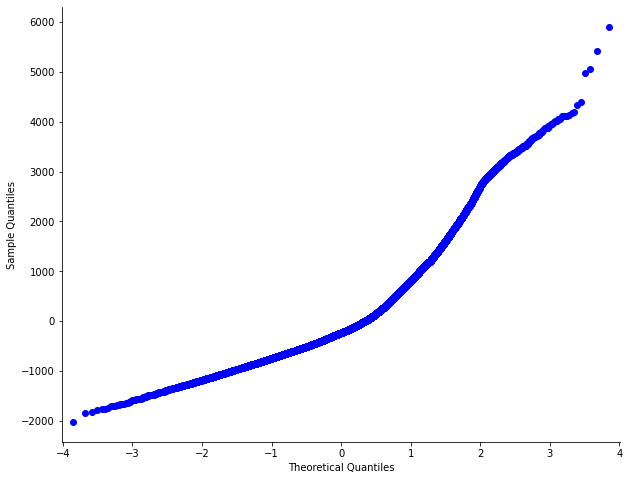

In [116]:
# QQ Plot For Model_RSE

fig, ax = plt.subplots(figsize=(10, 8))

sm.qqplot(model_RSE.resid, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

By examining QQ plot and JB testing, we can say that our residual is not normally distributed. However, since we have a large enough data set, we can proceed.